<a href="https://colab.research.google.com/github/renzotaco/IOIII/blob/main/reglineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#importamos la base de datos
data = pd.read_csv('ventas.csv')

In [4]:
data.head() #visualizamos los 5 primeros conjuntos de datos

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
corr_matrix = data.corr()#determinamos la correlación entre variables
corr_matrix['Sales'].sort_values(ascending=False) #visualizamos la correlación con respecto a la variable "Sales"

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [6]:
lm = smf.ols(formula='Sales~TV',data=data).fit() #ajustamos el modelo mediante el método de smf

In [ ]:
lm.params #parámetros de la recta ajustada

Intercept    7.032594
TV           0.047537
dtype: float64

In [7]:
lm.rsquared #coeficiente de correlación

0.611875050850071

In [8]:
lm.summary() #resumen de datos estadísticos

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        00:31:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#predecimos la variable de salida para cada conjunto de datos
sales_pred = lm.predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

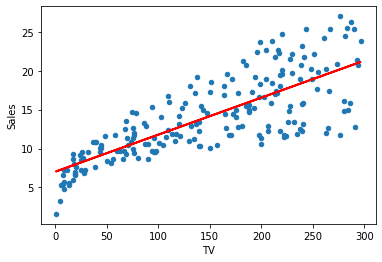

In [10]:
#visualizamos la gráfica de la recta de ajuste
%matplotlib inline
data.plot(kind='scatter',x='TV',y='Sales')
plt.plot(pd.DataFrame(data['TV']),sales_pred, c= 'red',linewidth=2)

In [ ]:
data['Sales_pred'] = 7.032594 + 0.047537 * data['TV'] #Creación de una columna con datos de la predicción

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales,Sales_pred
0,230.1,37.8,69.2,22.1,17.970858
1,44.5,39.3,45.1,10.4,9.147990
2,17.2,45.9,69.3,9.3,7.850230
3,151.5,41.3,58.5,18.5,14.234450
4,180.8,10.8,58.4,12.9,15.627284
